In [ ]:
library(factoextra)
library(readxl)
library(corrplot)
library(factoextra)

### Carga de Datos y Visualización

In [3]:
records <- read_excel("../Datasets/NationalTrackRecords2.xlsx")
head(records)

New names:
• `` -> `...1`


...1,100m,200m,400m,800m,1500m,3000m,Marathon
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
argentin,11.61,22.94,54.50,2.15,4.43,9.79,178.52
australi,11.20,22.35,51.08,1.98,4.13,9.08,152.37
austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98
brazil,11.31,23.17,52.80,2.10,4.49,9.77,168.75


Se cuenta cuenta con diferentes escalas (segundos, minutos y metros), por lo que conviene estandarizar los datos

In [13]:
dataset <- records[,2:8]

In [15]:
var(dataset)

,100m,200m,400m,800m,1500m,3000m,Marathon
100m,0.20449414,0.47871354,1.0109549,0.03561313,0.10949327,0.27648539,9.444360
200m,0.47871354,1.23445468,2.5501422,0.08706347,0.25793721,0.65016135,23.178626
400m,1.01095492,2.55014215,7.1734877,0.26041229,0.70145286,1.71690475,57.492462
800m,0.03561313,0.08706347,0.2604123,0.01171246,0.03243687,0.07704125,2.566373
1500m,0.10949327,0.25793721,0.7014529,0.03243687,0.11050673,0.26558165,8.880786
3000m,0.27648539,0.65016135,1.7169047,0.07704125,0.26558165,0.67952949,22.571667
Marathon,9.44436040,23.17862603,57.4924621,2.56637323,8.88078552,22.57166714,925.957204


In [16]:
cor(dataset)

,100m,200m,400m,800m,1500m,3000m,Marathon
100m,1.0000000,0.9527911,0.8346918,0.7276888,0.7283709,0.7416988,0.6863358
200m,0.9527911,1.0000000,0.8569621,0.7240597,0.6983643,0.7098710,0.6855745
400m,0.8346918,0.8569621,1.0000000,0.8984052,0.7878417,0.7776369,0.7054241
800m,0.7276888,0.7240597,0.8984052,1.0000000,0.9016138,0.8635652,0.7792922
1500m,0.7283709,0.6983643,0.7878417,0.9016138,1.0000000,0.9691690,0.8779334
3000m,0.7416988,0.7098710,0.7776369,0.8635652,0.9691690,1.0000000,0.8998374
Marathon,0.6863358,0.6855745,0.7054241,0.7792922,0.8779334,0.8998374,1.0000000


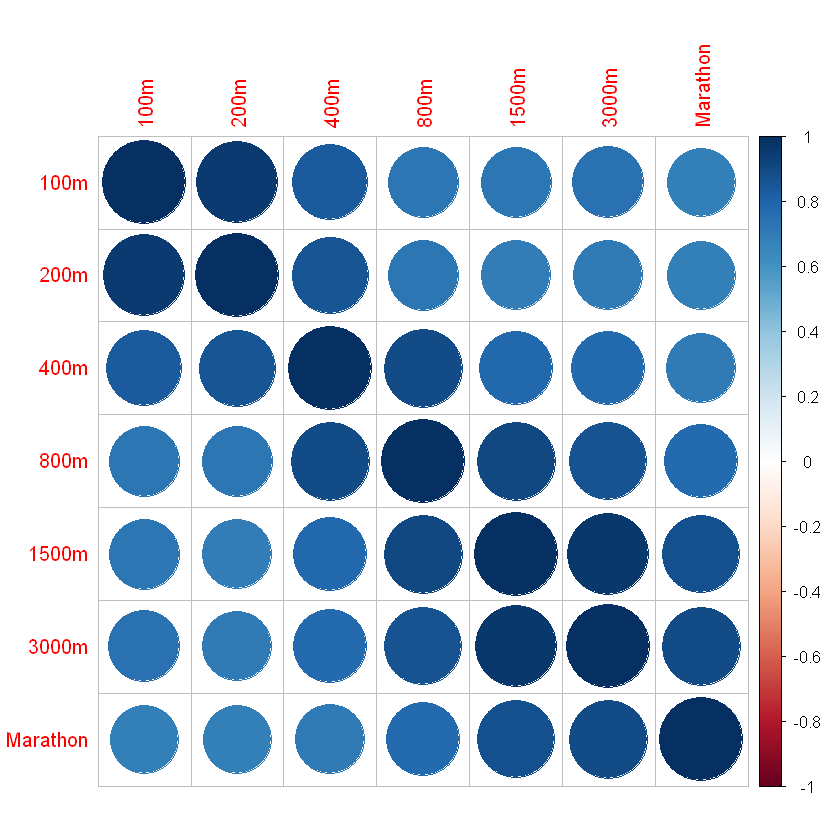

In [ ]:
cor.mat <- cor(
    dataset,
    use="complete.obs",
)
corrplot(cor.mat)

### PCA Función

In [22]:
PCA_corr <- princomp(
    dataset,
    cor = TRUE,
)
summary(PCA_corr)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.4094991 0.80848347 0.54761522 0.35422802 0.231984732
Proportion of Variance 0.8293837 0.09337793 0.04284035 0.01792536 0.007688131
Cumulative Proportion  0.8293837 0.92276161 0.96560196 0.98352731 0.991215445
                            Comp.6      Comp.7
Standard deviation     0.197608919 0.149808546
Proportion of Variance 0.005578469 0.003206086
Cumulative Proportion  0.996793914 1.000000000

In [23]:
PCA_corr$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
100m      0.368  0.490  0.286  0.319  0.231  0.620       
200m      0.365  0.537  0.230               -0.711 -0.109
400m      0.382  0.247 -0.515 -0.347 -0.572  0.191  0.208
800m      0.385 -0.155 -0.585         0.620        -0.315
1500m     0.389 -0.360         0.430        -0.231  0.693
3000m     0.389 -0.348  0.153  0.363 -0.463        -0.598
Marathon  0.367 -0.369  0.484 -0.672  0.131  0.142       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.143  0.143  0.143  0.143  0.143  0.143  0.143
Cumulative Var  0.143  0.286  0.429  0.571  0.714  0.857  1.000

In [27]:
eigen(cor.mat)

eigen() decomposition
$values
[1] 5.80568576 0.65364552 0.29988243 0.12547749 0.05381692 0.03904928 0.02244260

$vectors
           [,1]       [,2]        [,3]        [,4]        [,5]         [,6]
[1,] -0.3683561  0.4900597  0.28601157 -0.31938631 -0.23116950 -0.619825234
[2,] -0.3653642  0.5365800  0.22981913  0.08330196 -0.04145457  0.710764580
[3,] -0.3816103  0.2465377 -0.51536655  0.34737748  0.57217791 -0.190945970
[4,] -0.3845592 -0.1554023 -0.58452608  0.04207636 -0.62032379  0.019089032
[5,] -0.3891040 -0.3604093 -0.01291198 -0.42953873 -0.03026144  0.231248381
[6,] -0.3888661 -0.3475394  0.15272772 -0.36311995  0.46335476 -0.009277159
[7,] -0.3670038 -0.3692076  0.48437037  0.67249685 -0.13053590 -0.142280558
            [,7]
[1,]  0.05217655
[2,] -0.10922503
[3,]  0.20849691
[4,] -0.31520972
[5,]  0.69256151
[6,] -0.59835943
[7,]  0.06959828


In [33]:
(PCA_corr$sdev)^2 / sum((PCA_corr$sdev)^2)

Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
0.829383680 0.093377931 0.042840347 0.017925356 0.007688131 0.005578469 
     Comp.7 
0.003206086

### Selección de Componentes Principales

#### Preámbulo

In [6]:
records2 <- records[2:8]

In [7]:
var(records2)

,100m,200m,400m,800m,1500m,3000m,Marathon
100m,0.20449414,0.47871354,1.0109549,0.03561313,0.10949327,0.27648539,9.444360
200m,0.47871354,1.23445468,2.5501422,0.08706347,0.25793721,0.65016135,23.178626
400m,1.01095492,2.55014215,7.1734877,0.26041229,0.70145286,1.71690475,57.492462
800m,0.03561313,0.08706347,0.2604123,0.01171246,0.03243687,0.07704125,2.566373
1500m,0.10949327,0.25793721,0.7014529,0.03243687,0.11050673,0.26558165,8.880786
3000m,0.27648539,0.65016135,1.7169047,0.07704125,0.26558165,0.67952949,22.571667
Marathon,9.44436040,23.17862603,57.4924621,2.56637323,8.88078552,22.57166714,925.957204


In [26]:
cor.mat <- cor(records2)
cor.mat

,100m,200m,400m,800m,1500m,3000m,Marathon
100m,1.0000000,0.9527911,0.8346918,0.7276888,0.7283709,0.7416988,0.6863358
200m,0.9527911,1.0000000,0.8569621,0.7240597,0.6983643,0.7098710,0.6855745
400m,0.8346918,0.8569621,1.0000000,0.8984052,0.7878417,0.7776369,0.7054241
800m,0.7276888,0.7240597,0.8984052,1.0000000,0.9016138,0.8635652,0.7792922
1500m,0.7283709,0.6983643,0.7878417,0.9016138,1.0000000,0.9691690,0.8779334
3000m,0.7416988,0.7098710,0.7776369,0.8635652,0.9691690,1.0000000,0.8998374
Marathon,0.6863358,0.6855745,0.7054241,0.7792922,0.8779334,0.8998374,1.0000000


In [9]:
cor.mtest(records2,conf.lever=0.95)

,100m,200m,400m,800m,1500m,3000m,Marathon
100m,0.000000e+00,4.187611e-29,2.410317e-15,3.098253e-10,2.926945e-10,9.298639e-11,7.296030e-09
200m,4.187611e-29,0.000000e+00,6.993785e-17,4.181338e-10,3.074942e-09,1.292125e-09,7.695510e-09
400m,2.410317e-15,6.993785e-17,0.000000e+00,1.386151e-20,9.546071e-13,2.883749e-12,1.815272e-09
800m,3.098253e-10,4.181338e-10,1.386151e-20,0.000000e+00,6.172143e-21,2.179996e-17,2.419940e-12
1500m,2.926945e-10,3.074942e-09,9.546071e-13,6.172143e-21,0.000000e+00,6.419450e-34,1.378219e-18
3000m,9.298639e-11,1.292125e-09,2.883749e-12,2.179996e-17,6.419450e-34,0.000000e+00,9.692589e-21
Marathon,7.296030e-09,7.695510e-09,1.815272e-09,2.419940e-12,1.378219e-18,9.692589e-21,0.000000e+00
,100m,200m,400m,800m,1500m,3000m,Marathon
100m,1.0000000,0.9200601,0.7313446,0.5730142,0.5739882,0.5931078,0.5147694
200m,0.9200601,1.0000000,0.7657603,0.5678393,0.5315495,0.5477251,0.5137117


In [10]:
cor(records2,use="complete.obs")

,100m,200m,400m,800m,1500m,3000m,Marathon
100m,1.0000000,0.9527911,0.8346918,0.7276888,0.7283709,0.7416988,0.6863358
200m,0.9527911,1.0000000,0.8569621,0.7240597,0.6983643,0.7098710,0.6855745
400m,0.8346918,0.8569621,1.0000000,0.8984052,0.7878417,0.7776369,0.7054241
800m,0.7276888,0.7240597,0.8984052,1.0000000,0.9016138,0.8635652,0.7792922
1500m,0.7283709,0.6983643,0.7878417,0.9016138,1.0000000,0.9691690,0.8779334
3000m,0.7416988,0.7098710,0.7776369,0.8635652,0.9691690,1.0000000,0.8998374
Marathon,0.6863358,0.6855745,0.7054241,0.7792922,0.8779334,0.8998374,1.0000000


In [15]:
pca <- princomp(records2,cor=TRUE)

In [16]:
summary(pca)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.4094991 0.80848347 0.54761522 0.35422802 0.231984732
Proportion of Variance 0.8293837 0.09337793 0.04284035 0.01792536 0.007688131
Cumulative Proportion  0.8293837 0.92276161 0.96560196 0.98352731 0.991215445
                            Comp.6      Comp.7
Standard deviation     0.197608919 0.149808546
Proportion of Variance 0.005578469 0.003206086
Cumulative Proportion  0.996793914 1.000000000

In [17]:
pca$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
100m      0.368  0.490  0.286  0.319  0.231  0.620       
200m      0.365  0.537  0.230               -0.711 -0.109
400m      0.382  0.247 -0.515 -0.347 -0.572  0.191  0.208
800m      0.385 -0.155 -0.585         0.620        -0.315
1500m     0.389 -0.360         0.430        -0.231  0.693
3000m     0.389 -0.348  0.153  0.363 -0.463        -0.598
Marathon  0.367 -0.369  0.484 -0.672  0.131  0.142       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.143  0.143  0.143  0.143  0.143  0.143  0.143
Cumulative Var  0.143  0.286  0.429  0.571  0.714  0.857  1.000

In [18]:
pca$sdev

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7 
2.4094991 0.8084835 0.5476152 0.3542280 0.2319847 0.1976089 0.1498085

In [20]:
var.pca = (pca$sdev)^2
var.pca / sum(var.pca)

Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
0.829383680 0.093377931 0.042840347 0.017925356 0.007688131 0.005578469 
     Comp.7 
0.003206086

#### Selección de PCs

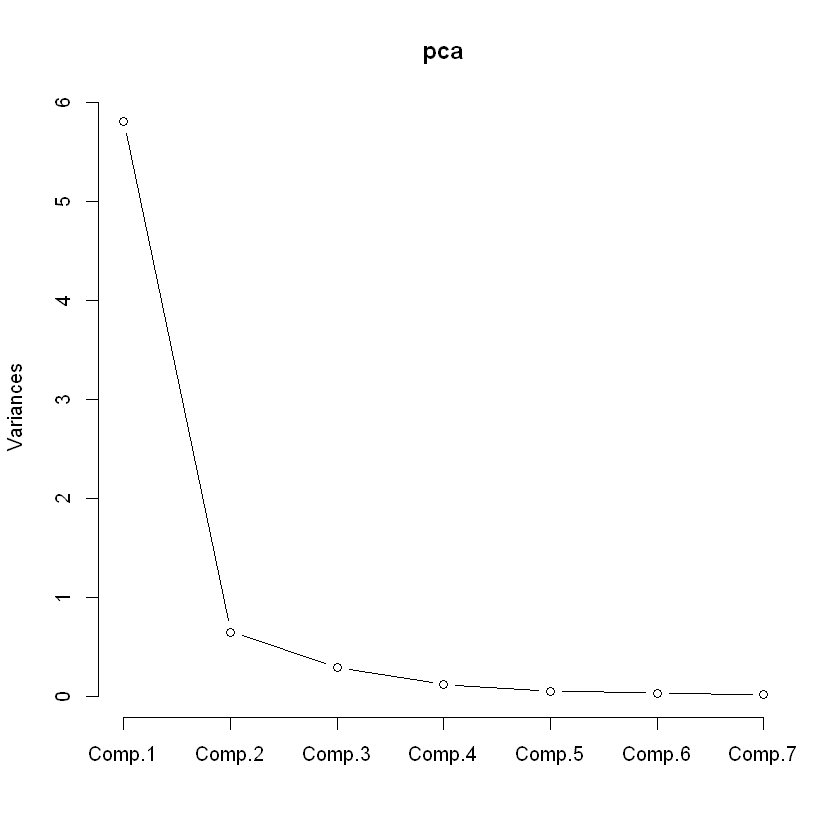

In [ ]:
# Screeplot

screeplot(pca,type="lines")

In [30]:
# Regla de Kaiser

eigen_values <- pca$sdev^2

which(eigen_values>1)

Comp.1 
     1

In [32]:
install.packages("psych")
library(psych)

Installing package into 'C:/Users/alexi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'mnormt', 'GPArotation'




package 'mnormt' successfully unpacked and MD5 sums checked
package 'GPArotation' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alexi\AppData\Local\Temp\RtmpyQU6V1\downloaded_packages


Warning message:
"package 'psych' was built under R version 4.4.3"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


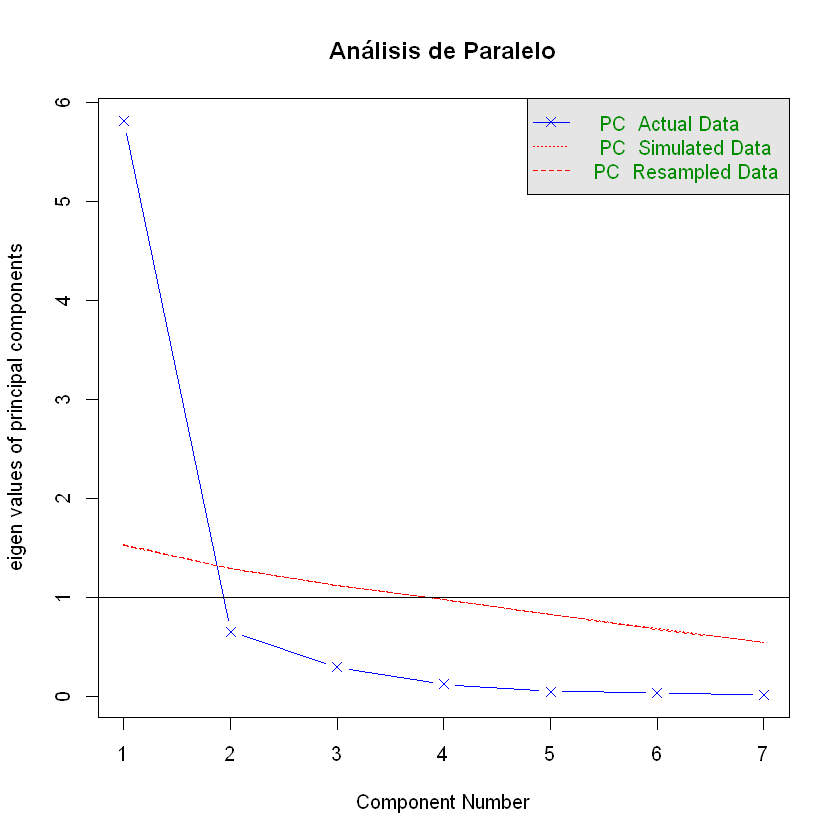

In [34]:
## Regla de Horn

set.seed(123)
fa.parallel(records2,fa="pc",n.iter=100,show.legend=TRUE,main="Análisis de Paralelo")

In [36]:
install.packages("nFactors")
library(nFactors)

Installing package into 'C:/Users/alexi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'nFactors' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alexi\AppData\Local\Temp\RtmpyQU6V1\downloaded_packages


Warning message:
"package 'nFactors' was built under R version 4.4.3"


In [43]:
ev_cor <- eigen(cor.mat)

In [40]:
sim_data <- parallel(subject=nrow(records2),var=ncol(records2),rep=100,cent=0.05)

In [ ]:
nScree(x=ev_cor$values,aparallel=sim_data$eigen$qevpea,cor=TRUE)

$Components
  noc naf nparallel nkaiser
1   1   1         1       1

$Analysis
  Eigenvalues        Prop      Cumu Par.Analysis   Pred.eig     OC   Acc.factor
1  5.80568576 0.829383680 0.8293837    1.3432919 0.77988610 (< OC)           NA
2  0.65364552 0.093377931 0.9227616    1.2001641 0.36924239         4.798277154
3  0.29988243 0.042840347 0.9656020    1.0304401 0.15982245         0.179358144
4  0.12547749 0.017925356 0.9835273    0.8892589 0.06950407         0.102744366
5  0.05381692 0.007688131 0.9912154    0.7172252 0.05565597         0.056892945
6  0.03904928 0.005578469 0.9967939    0.5759915         NA        -0.001839054
7  0.02244260 0.003206086 1.0000000    0.4072560         NA                  NA
      AF
1 (< AF)
2       
3       
4       
5       
6       
7       

$Model
[1] "components"

attr(,"class")
[1] "nScree"

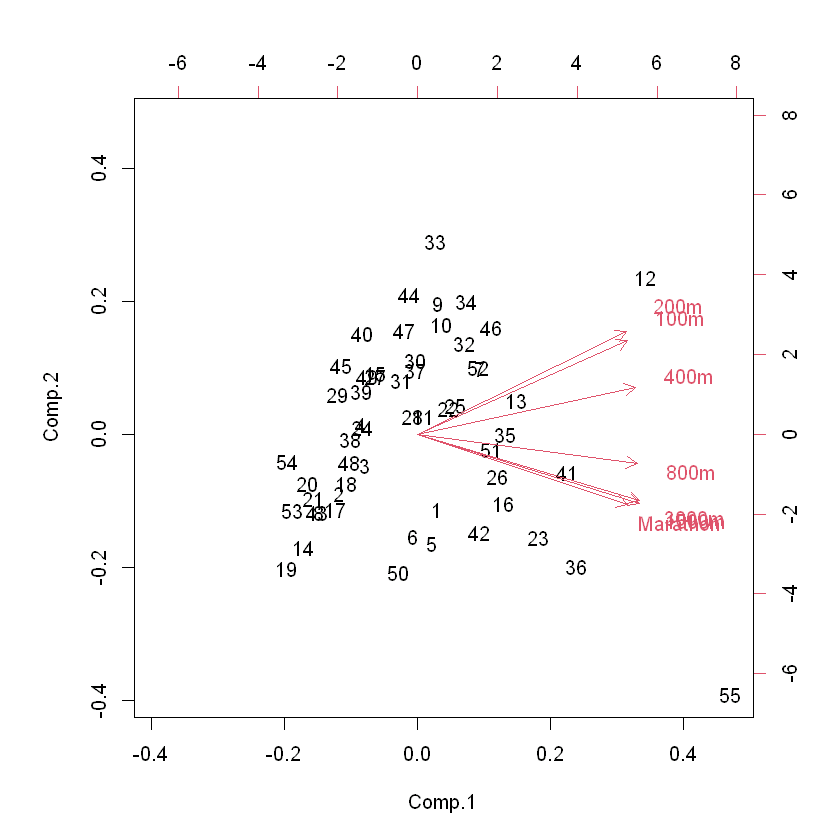

In [ ]:
# Plot para PCA

biplot(pca)

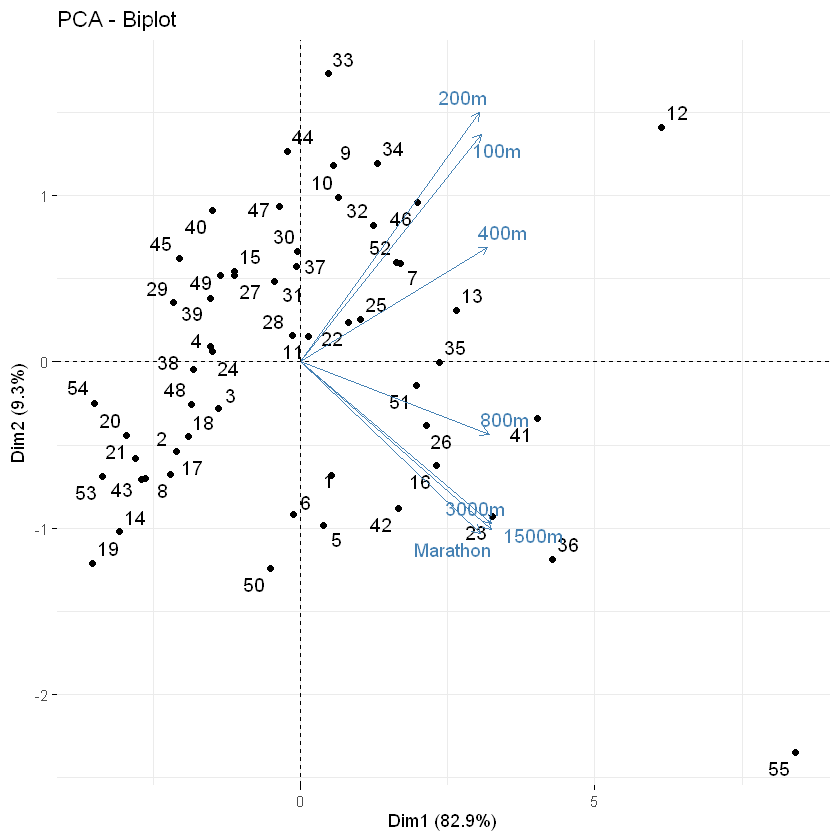

In [47]:
fviz_pca_biplot(pca,repel=TRUE)